In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("../input/Chapter 12 German Credit Rating.xlsx")

In [4]:
df.shape

(1000, 16)

In [5]:
df.head()

,S.No,CHK_ACCT,Duration,Credit History,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,Present Resident,Age,Other installment,Num_Credits,Job,Credit classification,Credit Rating
0,1.0,0DM,6,critical,1169,unknown,over-seven,4,Single,4,67,1,2,Unskilled,good.,0
1,2.0,less-200DM,48,all-paid-duly,5951,less100DM,four-years,2,female-divorced,2,22,0,1,skilled,bad.,1
2,3.0,no-account,12,critical,2096,less100DM,seven-years,2,Single,3,49,0,1,Unskilled,good.,0
3,4.0,0DM,42,all-paid-duly,7882,less100DM,seven-years,2,Single,4,45,0,1,skilled,good.,0
4,5.0,0DM,24,delay,4870,less100DM,four-years,3,Single,4,53,1,2,skilled,bad.,1


In [6]:
df = df.drop("S.No",axis=1)

In [7]:
df.head()

,CHK_ACCT,Duration,Credit History,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,Present Resident,Age,Other installment,Num_Credits,Job,Credit classification,Credit Rating
0,0DM,6,critical,1169,unknown,over-seven,4,Single,4,67,1,2,Unskilled,good.,0
1,less-200DM,48,all-paid-duly,5951,less100DM,four-years,2,female-divorced,2,22,0,1,skilled,bad.,1
2,no-account,12,critical,2096,less100DM,seven-years,2,Single,3,49,0,1,Unskilled,good.,0
3,0DM,42,all-paid-duly,7882,less100DM,seven-years,2,Single,4,45,0,1,skilled,good.,0
4,0DM,24,delay,4870,less100DM,four-years,3,Single,4,53,1,2,skilled,bad.,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CHK_ACCT                1000 non-null   object
 1   Duration                1000 non-null   int64 
 2   Credit History          1000 non-null   object
 3   Credit Amount           1000 non-null   int64 
 4   Balance in Savings A/C  1000 non-null   object
 5   Employment              1000 non-null   object
 6   Install_rate            1000 non-null   int64 
 7   Marital status          1000 non-null   object
 8   Present Resident        1000 non-null   int64 
 9   Age                     1000 non-null   int64 
 10  Other installment       1000 non-null   int64 
 11  Num_Credits             1000 non-null   int64 
 12  Job                     1000 non-null   object
 13  Credit classification   1000 non-null   object
 14  Credit Rating           1000 non-null   int64 
dtypes: in

In [17]:
cat_cols = [ f for f in df.columns if df[f].dtypes=="O"]

In [18]:
cat_cols

['CHK_ACCT',
 'Credit History',
 'Balance in Savings A/C',
 'Employment',
 'Marital status',
 'Job',
 'Credit classification']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [24]:
for f in cat_cols:
    enc = LabelEncoder()
    enc.fit(df[f])
    df[f] = enc.transform(df[f])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CHK_ACCT                1000 non-null   int32
 1   Duration                1000 non-null   int64
 2   Credit History          1000 non-null   int32
 3   Credit Amount           1000 non-null   int64
 4   Balance in Savings A/C  1000 non-null   int32
 5   Employment              1000 non-null   int32
 6   Install_rate            1000 non-null   int64
 7   Marital status          1000 non-null   int32
 8   Present Resident        1000 non-null   int64
 9   Age                     1000 non-null   int64
 10  Other installment       1000 non-null   int64
 11  Num_Credits             1000 non-null   int64
 12  Job                     1000 non-null   int32
 13  Credit classification   1000 non-null   int32
 14  Credit Rating           1000 non-null   int64
dtypes: int32(7), int64(8)


In [27]:
df.head()

,CHK_ACCT,Duration,Credit History,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,Present Resident,Age,Other installment,Num_Credits,Job,Credit classification,Credit Rating
0,0,6,2,1169,4,2,4,5,4,67,1,2,5,1,0
1,1,48,4,5951,1,0,2,0,2,22,0,1,1,0,1
2,2,12,2,2096,1,3,2,5,3,49,0,1,5,1,0
3,0,42,4,7882,1,3,2,5,4,45,0,1,1,1,0
4,0,24,3,4870,1,0,3,5,4,53,1,2,1,0,1


In [28]:
df.describe()

,CHK_ACCT,Duration,Credit History,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,Present Resident,Age,Other installment,Num_Credits,Job,Credit classification,Credit Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.246000,20.903000,3.019000,3271.258000,2.258000,1.448000,2.973000,2.892000,2.845000,35.546000,0.414000,1.407000,1.634000,0.700000,0.300000
std,0.927547,12.058814,1.174742,2822.736876,1.727548,1.283333,1.118715,2.196169,1.103718,11.375469,0.492795,0.577654,1.629325,0.458487,0.458487
min,0.000000,4.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,1.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.000000,1365.500000,1.000000,0.000000,2.000000,0.000000,2.000000,27.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,18.000000,4.000000,2319.500000,1.000000,1.000000,3.000000,4.000000,3.000000,33.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,24.000000,4.000000,3972.250000,4.000000,2.000000,4.000000,5.000000,4.000000,42.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,3.000000,72.000000,4.000000,18424.000000,6.000000,4.000000,4.000000,5.000000,4.000000,75.000000,1.000000,4.000000,5.000000,1.000000,1.000000


In [30]:
num_featurs = [f for f in df.columns if f not in cat_cols]

In [31]:
num_featurs

['Duration',
 'Credit Amount',
 'Install_rate',
 'Present Resident',
 'Age',
 'Other installment',
 'Num_Credits',
 'Credit Rating']

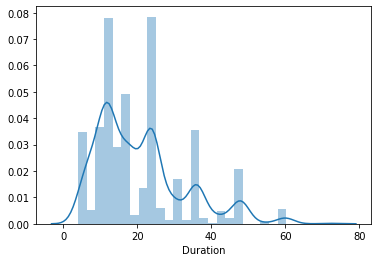

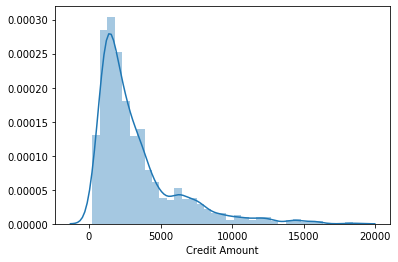

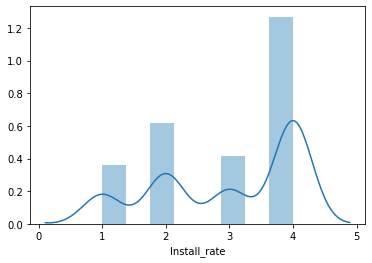

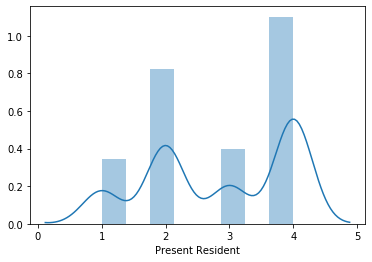

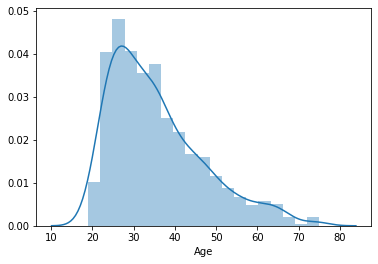

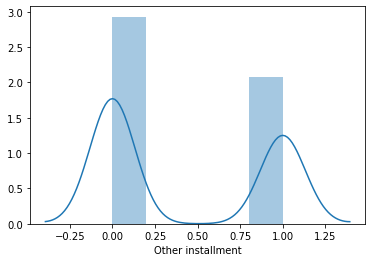

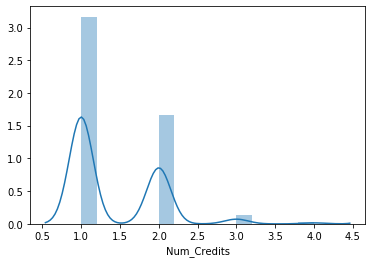

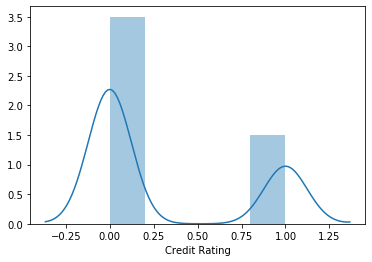

In [32]:
for f in num_featurs:
    sns.distplot(df[f])
    plt.show()

In [33]:
## Credit amount age

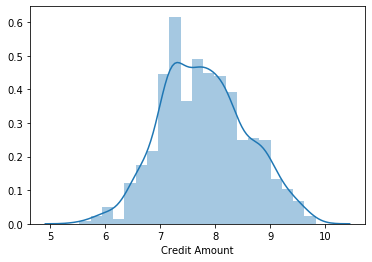

In [34]:
sns.distplot(np.log(df["Credit Amount"]+1))

In [35]:
df["Credit Amount"] = np.log(df["Credit Amount"]+1)

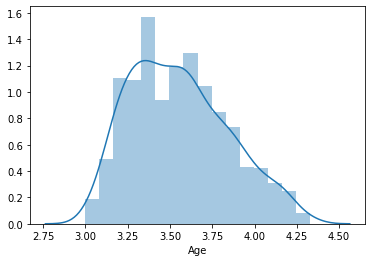

In [36]:
sns.distplot(np.log(df["Age"]+1))

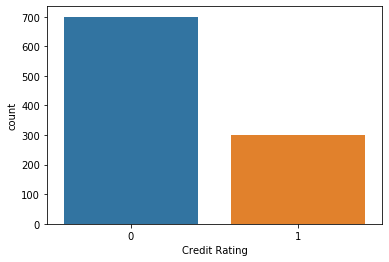

In [37]:
sns.countplot(df["Credit Rating"])

In [ ]:
### we will use roc score